## 0. Introduction
Objectif: réparer le dataset nettoyé issu de l’EDA pour la modélisation.

## 1. Import & configuration

In [14]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

sys.path.insert(0, "..")
from config import INTERIM_DATA_PATH, PROCESSED_DATA_PATH, TARGET_COL, FIG_DIR


print("[bold green]✅ Dossiers de sortie et variables vérifiés.[/bold green]")

✅ Dossiers de sortie et variables vérifiés.

## 2. Chargement du dataset

In [15]:
df = pd.read_csv(INTERIM_DATA_PATH)
print(
    f"[bold cyan]📥 Dataset chargé :[/bold cyan] {df.shape[0]} lignes × {df.shape[1]} colonnes"
)

# Vérification rapide
df.head()

📥 Dataset chargé : 17342 lignes × 19 colonnes

,x,y,is_left_footed,game_away,start,minute,half,is_endgame,is_start,time_norm,distance,angle,is_left_side,n_attempts_before,success_rate_before,has_previous_attempts,wind_speed,precipitation_probability,resultat
0,12,66,0,0,493,8,1,0,0,0.10,41,34,1,0,0.5,0,1.3,0.02,1
1,70,72,0,0,1481,25,1,0,0,0.31,45,51,0,1,100.0,1,1.3,0.02,1
2,23,62,0,0,2011,34,1,0,0,0.42,40,18,1,2,100.0,1,1.3,0.02,1
3,51,85,0,0,2285,38,1,0,0,0.48,22,47,0,3,100.0,1,1.3,0.02,1
4,51,73,0,0,4495,75,2,0,0,0.94,31,31,0,4,100.0,1,1.3,0.02,0


## 3. Suppression des features inutiles ou redondantes

In [16]:
# Suppression de x et y de la liste des features
df = df.drop(columns=["x", "y"])

# Ne conserver que time_norm et supprimer toutes les autres colonnes liées au temps
time_cols_to_delete = ["start", "minute", "half"]
df = df.drop(columns=time_cols_to_delete)

# Redondance dans les features liées aux tentatives précédentes
df = df.drop(columns=["success_rate_before", "n_attempts_before"])

## 3. Nouvelle matrice de corrélation après feature engineering / clean

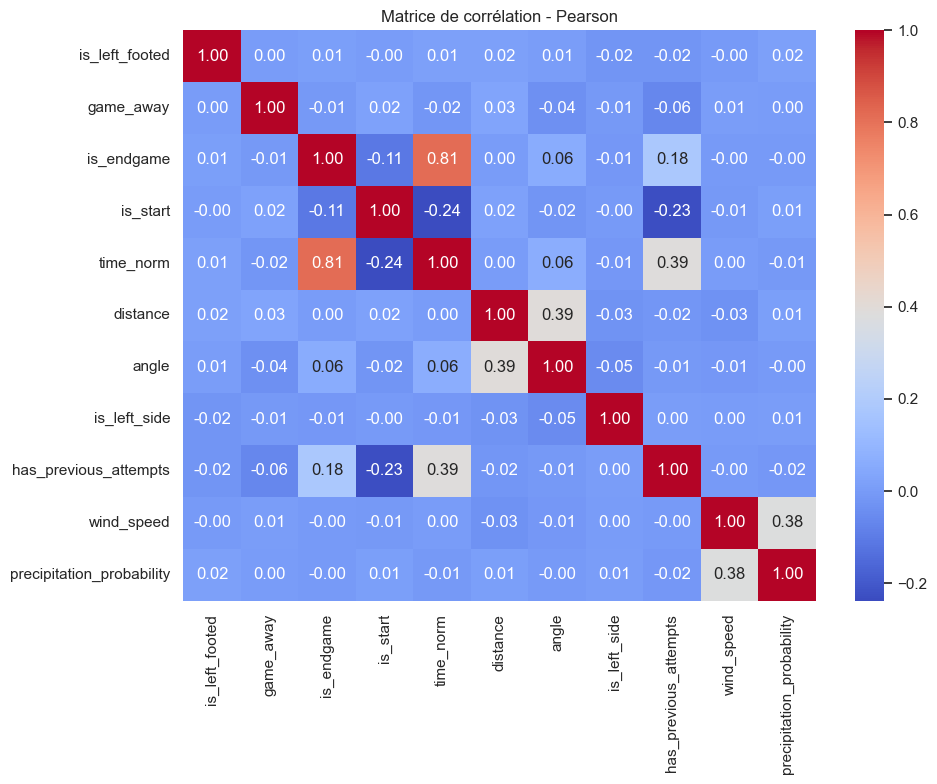

In [17]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if TARGET_COL in num_cols:
    num_cols.remove(TARGET_COL)

corr_pearson = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation - Pearson")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/correlation_matrix_pearson_post_featuring.png")
plt.show()

## 4. Sauvegarde du dataset prêt pour la modélisation

In [18]:
# Aperçu
print(f"Dataset final : {df.shape[0]} lignes × {df.shape[1]} colonnes")

df.to_csv(PROCESSED_DATA_PATH, index=False)
print(f"✅ CSV enregistré : {PROCESSED_DATA_PATH}")

Dataset final : 17342 lignes × 12 colonnes

✅ CSV enregistré : /Users/xaviercoulon/Documents/OC/OC_P6_Rugby_MLOps/data/processed/kicks_ready_for_model.csv